In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
sns.set_theme()

In [16]:
posteriors = pd.read_csv('./data/poisson_posteriors_liver_data.csv',index_col=0)
data_points = pd.read_csv('./data/poisson_filtered_data_liver.csv',index_col=0)
label = pd.read_csv('./data/poisson_labels_liver_data.csv',index_col=0)
label_data = pd.read_csv('./data/poisson_labels_liver_data.csv',index_col=0)

# Idea 1 use the percentage of counts used 

In [9]:
data_points_percentage = data_points.copy()
data_points_percentage['label'] = label.values
data_percentages = data_points_percentage.groupby('label').sum()

for col in data_percentages:
    data_percentages[col] = data_percentages[col] / np.sum(data_percentages[col])
sum_hor = np.sum(data_percentages, axis = 1)
for col in data_percentages:
    data_percentages[col] = data_percentages[col] / sum_hor
data_percentages.rename(columns = {
    'SRX008333':'ramosb1',
    'SRX008334':'ramosb2',
    'SRX008331':'HEK293T1',
    'SRX008332':'HEK293T2'
}, inplace = True)
data_percentages

,ramosb1,ramosb2,HEK293T1,HEK293T2
label,,,,
1,0.003072,0.002341,0.500974,0.493613
2,0.504199,0.493382,0.001156,0.001264
3,0.047662,0.048982,0.445225,0.458131
4,0.474408,0.482738,0.021708,0.021146
5,0.177825,0.172421,0.322971,0.326783
6,0.445974,0.442815,0.055971,0.055240
7,0.126230,0.127917,0.373925,0.371928
8,0.405267,0.398433,0.100669,0.095632
9,0.320088,0.325017,0.181299,0.173596


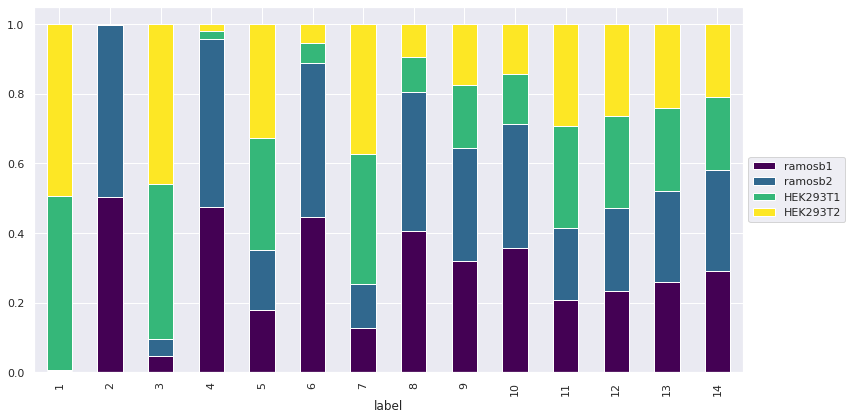

In [10]:
foo = np.random.rand(14)
data_percentages.plot.bar(stacked=True,  figsize=(12,6), cmap = 'viridis' )#width = foo)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.tight_layout()

In [11]:
data_percentages.iloc[:,:] = np.cumsum(data_percentages.values, axis = 1)

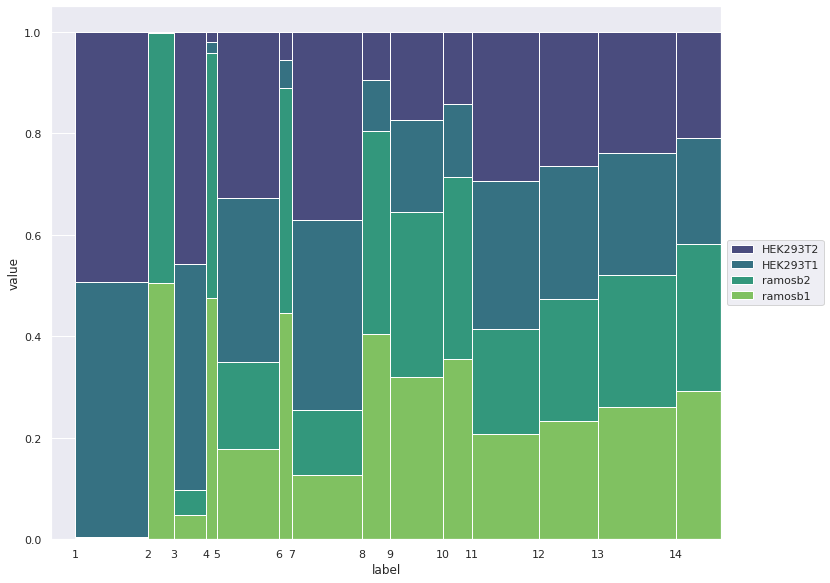

In [22]:
def change_width(ax, new_value) :
    cnt = 0
    for patch in ax.patches :
        current_width = patch.get_width()
        #diff = (current_width - new_value[cnt])
        #print(patch)
        # we change the bar width
        patch.set_width(new_value[cnt] * len(new_value))

        # we recenter the bar
        patch.set_x((np.cumsum(new_value)[cnt]-new_value[cnt])*len(new_value))
        
        cnt = (cnt+1) % len(new_value)

val,ori,label = [],[],[]
for col in data_percentages:
    val.extend(data_percentages[col].values)
    ori.extend([col]*len(data_percentages))
    label.extend(list(range(1,len(data_percentages)+1)))
df = pd.DataFrame({'value':val,'origin':ori, 'label': label})
fig, ax = plt.subplots()

sns.barplot(data = df, 
            y = 'value', 
            x = 'label', 
            hue = 'origin', 
            dodge = False, 
            hue_order = data_percentages.columns[::-1], 
            palette = 'viridis',
            ax = ax
           );
widths = label_data.value_counts(normalize = True).sort_index().values
change_width(ax = ax, new_value = widths)
fig.set_size_inches(11.7, 8.27)
ax.set_xticks((np.cumsum(widths)-widths)*len(widths))
ax.set_xticklabels(list(range(1,len(widths)+1)))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.tight_layout()

In [25]:
data_percentages

,ramosb1,ramosb2,HEK293T1,HEK293T2
label,,,,
1,0.003072,0.005414,0.506387,1.0
2,0.504199,0.997581,0.998736,1.0
3,0.047662,0.096644,0.541869,1.0
4,0.474408,0.957146,0.978854,1.0
5,0.177825,0.350245,0.673217,1.0
6,0.445974,0.888789,0.944760,1.0
7,0.126230,0.254148,0.628072,1.0
8,0.405267,0.803700,0.904368,1.0
9,0.320088,0.645105,0.826404,1.0
